<a href="https://colab.research.google.com/github/l0rdyolo/AI/blob/main/omerfarukcinoglu_ga_cozum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#read data
#plot data

In [ ]:
#### read data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/2025/kku_ai_final/data.csv"

In [ ]:
df = pd.read_csv(data_path)
df.head()

,x,y
0,-5.0,-298.108727
1,-4.9,-255.602630
2,-4.8,-175.073026
3,-4.7,-230.140740
4,-4.6,-166.632522


In [ ]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [ ]:
print(f"X aralığı: {x.min()} - {x.max()}")
print(f"Y aralığı: {y.min()} - {y.max()}")

X aralığı: -5.0 - 4.899999999999965
Y aralığı: -298.1087266529564 - 496.8772725634706


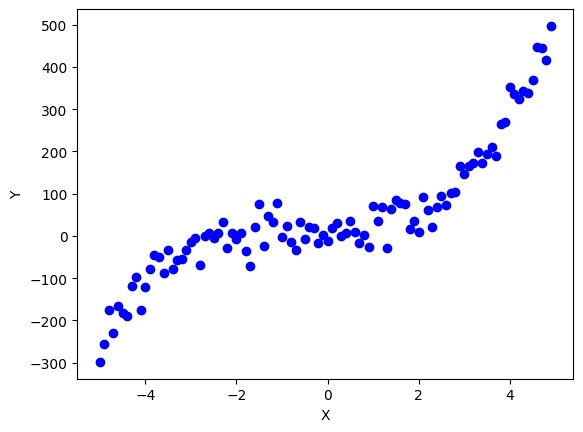

In [ ]:
plt.scatter(x, y, color='blue', alpha=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# ax^3 + bx^2 + cx + d

# ax^3 + bx^2 + cx + d  || x = -5.0	y = -298.108727
# -125a + 25b - 5c + d = -298

# **FUNCS**

In [ ]:
def mse_fitness(params, x, y):
    # params[0]: a, params[1]: b, params[2]: c, params[3]: d
    predictions = params[0] * x**3 + params[1] * x**2 + params[2] * x + params[3]
    mse = np.mean((y - predictions) ** 2)
    return -mse


In [ ]:
def select_best(population, fitness_values, num_parents):
    sorted_indices = np.argsort(fitness_values)
    return [population[i] for i in sorted_indices[-num_parents:]]


In [ ]:
def crossover(parent1, parent2):
    alpha = np.random.uniform(0, 1, len(parent1))
    child = alpha * parent1 + (1 - alpha) * parent2
    return child


In [ ]:
def mutate(individual, mutation_rate=0.1):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.uniform(-1, 1)
    return individual


In [ ]:
population_size = 100
population = [np.random.uniform(-10, 10, 4) for _ in range(population_size)]

In [ ]:

fitness_history = []

num_generations = 100
num_parents = 20

for generation in range(num_generations):
    fitness_values = [mse_fitness(ind, x, y) for ind in population]
    best_fitness = max(fitness_values)
    fitness_history.append(best_fitness)
    if (generation + 1) % 20 == 0 or generation == num_generations - 1:
        plt.plot(range(1, len(fitness_history) + 1), fitness_history, marker='o', linestyle='-')
        plt.title(f'iterasyon {generation + 1})')
        plt.xlabel('gen')
        plt.ylabel('en iyi Fitness')
        plt.grid()
        plt.show()
    parents = select_best(population, fitness_values, num_parents)
    children = []
    for _ in range(len(population) - len(parents)):
        p1, p2 = np.random.choice(len(parents), 2, replace=False)
        parent1, parent2 = parents[p1], parents[p2]
        child = crossover(parent1, parent2)
        child = mutate(child)
        children.append(child)
    population = parents + children

best_individual = select_best(population, fitness_values, 1)[0]
print("En iyi katsayılar:", best_individual)


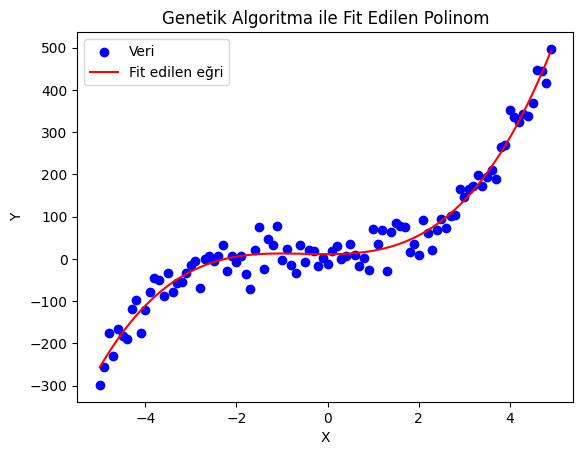

In [ ]:
a, b, c, d = best_individual
predictions = a * x**3 + b * x**2 + c * x + d

plt.scatter(x, y, color='blue', label='Veri')
plt.plot(x, predictions, color='red', label='Fit edilen eğri')
plt.title('Genetik Algoritma ile Fit Edilen Polinom')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
